## Laboration - Sweet & Conquer

**[Top Secret] Intelligence Briefing**


Mayday! Mayday! 

One of the farmers of Fire Nation, whilst on a trip abroad to the neighbouring Earth Kingdom, was bored and apparently threw an apple at a local peasant. 

Now, 24h hours later, the world is at war.

The conflict first involved only Fire Nation & the Earth Kingdom - but the Water Tribe and the Air Nomads swiftly decided to join in as well (for some random reason). 

Rumour is that they also wanted to join in on the apple free-for-all fiesta.


**Main objective**

Evidently, to win 'the apple wars', the goal of each faction is to steal all fruits from the others.

Our objective is to simulate the dynamics of this little... dispute. 


**Grading criteria & general instructions**

In general, grading will be based on the code in it's entirety. Extra weight will be put on readability, so think carefully about proper variable usage, method naming & docstrings and supplemental comments. 

Importantly, also make sure to implement type hints wherever applicable!

The tasks are categorized into difficulty tiers. To pass the lab (betyg G), you only need to work on the tasks designated with * (1 star) and completing most of them in a satisfactory manner. 

Succesfully completing the tasks marked with ** (two stars), and making atleast some progress on the one marked with *** (3 stars) ears your the higher grade (betyg VG).

There is another task, marked with BONUS. That one has no impact on the grading, but adds a fun dynamic to the simulation. It requires the task marked with *** to be completed first.



## Tasks

Here's the boilerplate (starter code) for a class called Faction that you'll be working on. The instances of this class will represent the different competing factions.

In [1]:
import matplotlib.pyplot as plt
import random
import time

class Faction:

    """
    A class representing a faction in the 'apple wars'.

    Each faction controls a set amount of fruits (apples, oranges, bananas and strawberries)
    that can grow organically or be stolen from other factions.
    
    
    * attributes:

    name (str): the name of the faction.

    apples (int): amount of apples currently controlled (0-200).

    oranges (int): amount of oranges currently controlled (0-200).

    bananas (int): amount of bananas currently controlled (0-200).

    strawberries (int): amount of strawberries currently controlled (0-200).


    * Methods:

    inventory() -> int: Returns the total number of fruits controlled by the faction.

    status() -> str: Returns a string about the faction's current status.

    visualize_resources() -> None: Displays a bar chart of the current fruit quantities.

    organical_growth() -> None: Randomly increases the amount of each fruit by 1-5.

    __mul__(other) -> None: Simulates an attack against another faction, potentially stealing resources.

    __repr__() -> str: Returns an unambiguous string representation of the object and its attributes.
    
    """

    def __init__(self, name: str, apples: int, oranges: int, bananas: int, strawberries: int) -> None:
        self.name = name
        self.apples = apples
        self.oranges = oranges
        self.bananas = bananas
        self.strawberries = strawberries

    @property
    def name(self) -> str:
        return self.__name
    
    @property
    def apples(self) -> int:
        return self.__apples
    
    @property
    def oranges(self) -> int:
        return self.__oranges
    
    @property
    def bananas(self) -> int:
        return self.__bananas
    
    @property
    def strawberries(self) -> int:
        return self.__strawberries

    @name.setter
    def name(self, value: str):
        # Set faction name, ensuring it is a valid string
        if isinstance(value, str):
            self.__name = value
        else:
            raise TypeError('Name must be a string')
        
    @apples.setter
    def apples(self, value: int):
        # Set apples count with valid type and range
        if isinstance(value, int):
            if value >= 0 and value < 201:
                self.__apples = value
            else:
                raise ValueError('Apples must be a number between 0 and 200')
        else:
            raise TypeError('Apples must be an integer')
        
    @oranges.setter
    def oranges(self, value: int):
        # Set oranges count with valid type and range
        if isinstance(value, int):
            if value >= 0 and value < 201:
                self.__oranges = value
            else:
                raise ValueError('Oranges must be a number between 0 and 200')
        else:
            raise TypeError('Oranges must be an integer')
        
    @bananas.setter
    def bananas(self, value: int):
        # Set bananas count with valid type and range
        if isinstance(value, int):
            if value >= 0 and value < 201:
                self.__bananas = value
            else:
                raise ValueError('Bananas must be a number between 0 and 200')
        else:
            raise TypeError('Bananas must be an integer')
        
    @strawberries.setter
    def strawberries(self, value: int):
        # Set strawberries count with valid type and range
        if isinstance(value, int):
            if value >= 0 and value < 201:
                self.__strawberries = value
            else:
                raise ValueError('Strawberries must be a number between 0 and 200')
        else:
            raise TypeError('Strawberries must be an integer')
        

    def inventory(self) -> int:

        total = self.apples + self.oranges + self.bananas + self.strawberries
        return total

    
    def status(self) -> str:
        
        total = self.apples + self.oranges + self.bananas + self.strawberries
        
        if total <= 150:
            return f'This aint nothin but a scratch! {self.name} might be struggling for the moment, but will be back with vengance!'

        elif 150 < total <= 500:
            return f'The proud {self.name} is VERY eager to toss some apples! Where are the opponents?!'
        
        elif 500 < total:
            return f'{self.name} is GODLIKE! Their position is super dominant!'
        
        else:
            pass

    def visualize_resources(self) -> None:      # Plots current fruit inventory in a bar chart

        fruits = ['Apples', 'Oranges', 'Bananas', 'Strawberries']
        counts = [self.apples, self.oranges, self.bananas, self.strawberries]

        bar_colors = [
            'tab:green' if number_of_fruits >= 100 else 
            'tab:orange' if number_of_fruits > 50 else 
            'tab:red' 
            for number_of_fruits in counts
            ]

        plt.bar(fruits, counts, color=bar_colors)
        plt.ylim(0, 200)
        plt.ylabel('Amount')
        plt.title(self.name, fontsize=20)
        plt.grid(True, axis='y', linestyle='-', alpha=0.5)
        plt.show()

    def organical_growth(self) -> None:     # Increases each fruit individually by a random amount ranging 1-5 and but fruit can not exceed 200 amount, also prints out the changes that are happening.

        fruits = ['Apples', 'Oranges', 'Bananas', 'Strawberries']
        counts = [self.apples, self.oranges, self.bananas, self.strawberries]

        print(f'\nOrganic Growth for {self.name}')

        for i in range(len(fruits)):
            growth = random.randint(1, 5)
            new_amount = counts[i] + growth

            if new_amount > 200:
                new_amount = 200
                print(f'Glorious {self.name} is already at maximum capacity for {fruits[i]}!')

            else:
                print(f'Glorious {self.name} has harvested {growth} {fruits[i]}, to a new total of {new_amount}!')

            counts[i] = new_amount

        self.apples, self.oranges, self.bananas, self.strawberries = counts



    def __mul__(self, other) -> None:       # Overloads the (*) operator to simulate combat between factions.

        fruits = ['Apples', 'Oranges', 'Bananas', 'Strawberries']
        defender_counts = [other.apples, other.oranges, other.bananas, other.strawberries]
        attacker_counts = [self.apples, self.oranges, self.bananas, self.strawberries]

        random_probability = random.random()    # Generates a random number between 0.0 and 1.0

        if sum(defender_counts) < 1:    # If the defending tribe is low on resources, the attacker is guided to attack another tribe.
            print(f'The defending {other.name} has zero resources left... There is no GLORY in kicking down on an opponent already brought to its knees.')
            time.sleep(2)
            print(f'The honorable {self.name} should attack another tribe.')

        else:

            if random_probability < 0.7:    # 70% probability of a successful attack.
                independent_random_probability = random.random()    # Generates another random number between 0.0 and 1.0

                if independent_random_probability < 0.1:        # Independent 10% probability of a critical attack once the first attack is successful.
                    print(f'Successful CRITICAL attack by the {self.name}!!!', end='\n\n')
                    time.sleep(2)

                    for i in range(len(fruits)):
                        if 0 < defender_counts[i] <= 5:     # If the defender's fruit count is between 1 and 5 the attacker steals the last of them.
                            stolen = defender_counts[i]
                            print(f'Humiliating blow! The {self.name} has taken the last {stolen} {fruits[i]} from the {other.name}')
                            time.sleep(2)

                        else:
                            stolen = round(defender_counts[i] * 0.4)
                            print(f'The {self.name} has stolen {stolen} {fruits[i]} from {other.name}.')
                            time.sleep(2)

                        new_defender_amount = defender_counts[i] - stolen
                        new_attacker_amount = attacker_counts[i] + stolen


                        if new_attacker_amount > 200:       # If the attacker's fruit count exceeds 200 it gets set to 200.
                            new_attacker_amount = 200
                            print(f'{self.name} has abundant resources, some {fruits[i]} got lost in the chaos of war!')
                            time.sleep(2)

                        defender_counts[i] = new_defender_amount
                        attacker_counts[i] = new_attacker_amount

                    self.apples, self.oranges, self.bananas, self.strawberries = attacker_counts
                    other.apples, other.oranges, other.bananas, other.strawberries = defender_counts

                    print(f'{self.name} updated fruits: {attacker_counts}')
                    print(f'{other.name} updated fruits: {defender_counts}')
                    

                else:
                    print(f'Successful attack by the {self.name}!', end='\n\n')
                    time.sleep(2)

                    for i in range(len(fruits)):
                        if 0 < defender_counts[i] <= 5:     # If the defender's fruit count is between 1 and 5 the attacker steals the last of them.
                            stolen = defender_counts[i]
                            print(f'Humiliating blow! The {self.name} has taken the last {stolen} {fruits[i]} from the {other.name}')
                            time.sleep(2)

                        else:
                            stolen = round(defender_counts[i] * 0.2)
                            print(f'The {self.name} has stolen {stolen} {fruits[i]} from {other.name}.')
                            time.sleep(2)

                        new_defender_amount = defender_counts[i] - stolen
                        new_attacker_amount = attacker_counts[i] + stolen


                        if new_attacker_amount > 200:       # If the attacker's fruit count exceeds 200 it gets set to 200.
                            new_attacker_amount = 200
                            print(f'{self.name} has abundant resources, some {fruits[i]} got lost in the chaos of war!')
                            time.sleep(2)

                        defender_counts[i] = new_defender_amount
                        attacker_counts[i] = new_attacker_amount

                    self.apples, self.oranges, self.bananas, self.strawberries = attacker_counts
                    other.apples, other.oranges, other.bananas, other.strawberries = defender_counts
                    
                    print()
                    print(f'{self.name} updated fruits: {attacker_counts}')
                    print(f'{other.name} updated fruits: {defender_counts}')

            else:
                print(f'{other.name} has defended skillfully and retains all their resources.')     # If the variable 'random_probability' has a value over 0.7 (30% probability) the defending tribe keeps all their resources.


    
    def trade_offer(self) -> None:
        
        pass


    def __repr__(self) -> str:
        
        """Returns an unambigious string representation of the object and its attributes"""

        return f'Faction(name="{self.name}", apples={self.apples}, oranges={self.oranges}, bananas={self.bananas}, strawberries={self.strawberries})'

**1)*** 

* The __init__() method

This method should be able to accept the following user-provided arguments: **name**, **apples**, **oranges**, **bananas**, **strawberries** and initiate corresponding attributes with the same name as the arguments. 

Attribute description:

**name**         : the name of the faction

**apples**       : amount of apples currently controlled

**oranges**      : amount of oranges currently controlled

**bananas**      : amount of bananas currently controlled

**strawberries** : amount of strawberries currently controlled

*Don't forget to define getter and setter methods for the attributes!*

--

Restrictions:

The name should be handed in as a string. Implement relevant checks and raise TypeError (with a suitable message) else.

The fruit amounts should be given in integers. Implement relevant checks and raise TypeError (with a suitable message) else.

Furthermore, the fruit amounts should only be between 0-200. Implement relevant checks and raise ValueError (with a suitable message) else.

In [2]:
# you should now be able to create the following instances

fire_nation = Faction('Fire Nation', 120, 120, 150, 180)
earth_kingdom = Faction('Earth Kingdom', 6, 4, 2, 1)
water_tribe = Faction('Water Tribe', 100, 100, 100, 100)
air_nomads = Faction('Air Nomads', 100, 100, 100, 100)

In [3]:
# neither one of these should now work (try each one seperatly, by commenting the others out)
 
# pancake_cult = Faction('Pancake Cult', 30, 20, 200, 210)
# cupcake_assassins = Faction('Cupcake Assassins', 1, 1, 1, -5)
# milk_drinkers = Faction('Milk Drinkers', 30, [50], 200, 160)

**2)*** 

* The __repr__() method

This method takes no user-provided arguments. When called on, **returns** a clear and concise string with information about the current attributes of this instance.

For example, using the following code:

        print(fire_nation)

should print out the following string:

        Faction(name='Fire Nation', apples=120, oranges=120, bananas=150, strawberries=180)

In [4]:
# you should now be able to run this

print(fire_nation)
print(earth_kingdom)
print(water_tribe)
print(air_nomads)

Faction(name="Fire Nation", apples=120, oranges=120, bananas=150, strawberries=180)
Faction(name="Earth Kingdom", apples=6, oranges=4, bananas=2, strawberries=1)
Faction(name="Water Tribe", apples=100, oranges=100, bananas=100, strawberries=100)
Faction(name="Air Nomads", apples=100, oranges=100, bananas=100, strawberries=100)


**3)*** 

* getters and setters

You should've already implemented these in problem 1) already, but if not, you really should now.

They allow the user to read and alter the current values of the various private attributes.

For example, using the following code:

        print(fire_nation.name)

should print out the following string:

        Fire Nation

In [5]:
# this code should now reproduce the output in the example

print(fire_nation.name)

Fire Nation


**4)***

* The inventory() method

This method takes no user provided arguments. It **returns** the total amount of fruits the faction currently possess - and this should be a single integer. 

In [6]:
# try it yourself after implementing

print(f'The Fire Nation currently control a total amount of {fire_nation.inventory()} fruits')
print(f'The Earth Kingdom currently control a total amount of {earth_kingdom.inventory()} fruits')
print(f'The Water Tribe currently control a total amount of {water_tribe.inventory()} fruits')
print(f'The Air Nomads currently control a total amount of {air_nomads.inventory()} fruits')

The Fire Nation currently control a total amount of 570 fruits
The Earth Kingdom currently control a total amount of 13 fruits
The Water Tribe currently control a total amount of 400 fruits
The Air Nomads currently control a total amount of 400 fruits


**5)***

* The status() method

This method takes no user provided arguments. It prints out the state of each faction depending on the total number of fruits they currently possess.

Here's a guide to what should be printed out, depending on the total number of fruits

        total <= 150:

                This aint nothin but a scratch! {faction_name} might be struggling for the moment, but will be back with vengance!

        150 < total <= 500:

                The proud {faction_name} is VERY eager to toss some apples! Where are the opponents?!
        
        500 < total:

                {faction_name} is GODLIKE! Their position is super dominant!

In [7]:
# try it yourself after implementing
print(f'Fire Nation status: {fire_nation.status()}')
print(f'Earth Kingdom status: {earth_kingdom.status()}')
print(f'Water Tribe status: {water_tribe.status()}')
print(f'Air Nomads status: {air_nomads.status()}')

Fire Nation status: Fire Nation is GODLIKE! Their position is super dominant!
Earth Kingdom status: This aint nothin but a scratch! Earth Kingdom might be struggling for the moment, but will be back with vengance!
Water Tribe status: The proud Water Tribe is VERY eager to toss some apples! Where are the opponents?!
Air Nomads status: The proud Air Nomads is VERY eager to toss some apples! Where are the opponents?!


**6)****

* The visualize_resources() method

This method takes no user provided arguments. It should plot a **bar chart** which visualises the quantity of each fruit currently possessed by the faction.

For bonuspoints, make sure that the color each individual bar is

    green if fruit_amount => 100
    orange if 50 < fruit_amount < 100
    red if fruit_amount <= 50

In general, try to make the plot 'visually appealing'. You might have to do some research online on how to do this.

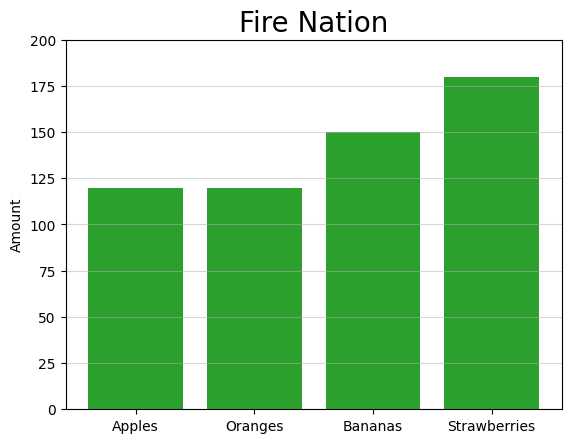

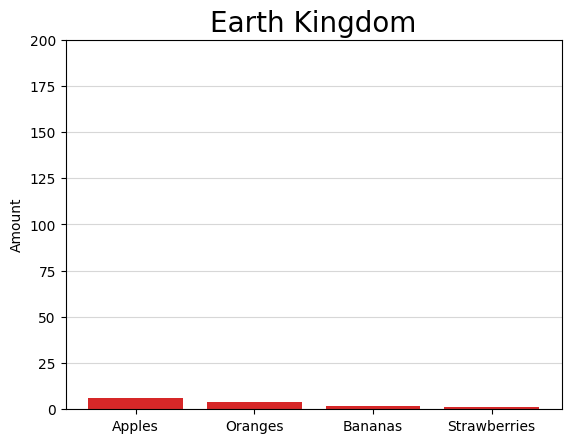

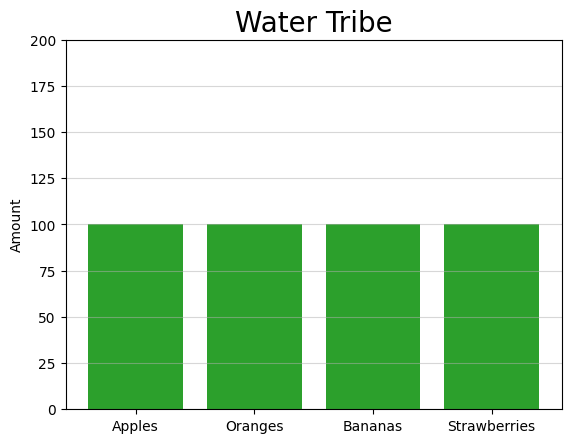

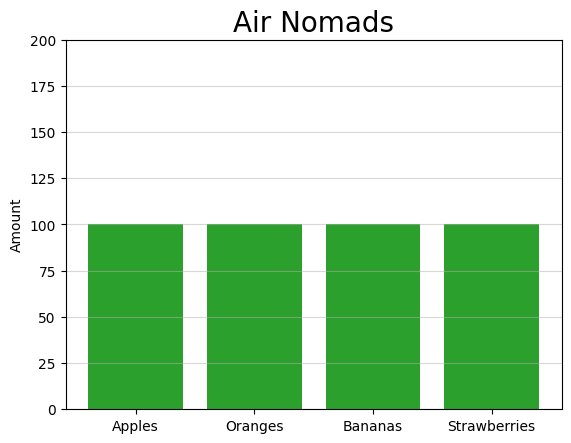

In [8]:
# try it yourself after implementing
fire_nation.visualize_resources()
earth_kingdom.visualize_resources()
water_tribe.visualize_resources()
air_nomads.visualize_resources()

**7)****

* The organical_growth() method

This method takes no user provided arguments. It represents the fact that each faction has natural farms that grow fruits.

When this method is called by a faction, it should randomly increase the amound of each, individually, by a seperate random amount ranging from 1 to 5.

Remember that the maximum amount of each fruit, individually, is 200. Make sure that the amount is unable to increase beyond that.

Also, print out the changes that are happening. For example:

    if current_amount_of_oranges < 200:
    
        Glorious {faction_name} has harvested 4 oranges, to a new total of 164!

    if current_amount_of_oranges == 200:

        Glorious {faction_name} is already at maximum capacity for oranges!
    
        

In [9]:
# try it yourself after implementing
fire_nation.organical_growth()
earth_kingdom.organical_growth()
water_tribe.organical_growth()
air_nomads.organical_growth()


Organic Growth for Fire Nation
Glorious Fire Nation has harvested 4 Apples, to a new total of 124!
Glorious Fire Nation has harvested 3 Oranges, to a new total of 123!
Glorious Fire Nation has harvested 3 Bananas, to a new total of 153!
Glorious Fire Nation has harvested 1 Strawberries, to a new total of 181!

Organic Growth for Earth Kingdom
Glorious Earth Kingdom has harvested 3 Apples, to a new total of 9!
Glorious Earth Kingdom has harvested 5 Oranges, to a new total of 9!
Glorious Earth Kingdom has harvested 2 Bananas, to a new total of 4!
Glorious Earth Kingdom has harvested 4 Strawberries, to a new total of 5!

Organic Growth for Water Tribe
Glorious Water Tribe has harvested 1 Apples, to a new total of 101!
Glorious Water Tribe has harvested 4 Oranges, to a new total of 104!
Glorious Water Tribe has harvested 5 Bananas, to a new total of 105!
Glorious Water Tribe has harvested 5 Strawberries, to a new total of 105!

Organic Growth for Air Nomads
Glorious Air Nomads has harvest

**8)*****

* The __mul__() method

Here we go! We're going to overload the * operator to represent an attack on a rival faction!

    When an attack occurs, there will be an 70% probability of it being successful. 

If the attack fails, the defender is considered to have defended skillfully and nothing else happens.

    A successful attack will transfer, to the attacking faction, 20% of all remaining fruits (of all sorts) from the defending rival faction.

In addition, if an attack is successful, there is an independent 10% probability of it being CRITICAL. This will increase the percentage looted to 40%, instead of 20%

    Importantly, if the defending faction has no resources left once the attack starts, the aggressor should be prompted to choose another target since there is no GLORY in kicking down on an opponent already brought to its knees.

Remember that the total number of each fruit a faction can hold can't increase beyond 200. If more is looted by the attacker  can be held by the attack, we consider those abundant fruits 'casaulties of war'. Meaning, the defending faction still loses them, but they are simply lost in the chaos and not added to the attackers stockpile.

    Additionally, if for example a faction only has a few remaining (say ~5) fruits remaining of any given kind - implement some functionality for a 'humilitating blow' whereby the attacker steals all remaining fruits. This is needed since only looting percentages will make it impossible to nullify a factions resources. 

For each of the possible actions described above, print out some cool texts so that the user is able to clearly follow the silliness!

    As an extra, you can first import time, and then add time.sleep(2) after each print, to create some suspense.

In [10]:
# try it yourself after implementing
earth_kingdom * fire_nation

Successful CRITICAL attack by the Earth Kingdom!!!

The Earth Kingdom has stolen 50 Apples from Fire Nation.
The Earth Kingdom has stolen 49 Oranges from Fire Nation.
The Earth Kingdom has stolen 61 Bananas from Fire Nation.
The Earth Kingdom has stolen 72 Strawberries from Fire Nation.
Earth Kingdom updated fruits: [59, 58, 65, 77]
Fire Nation updated fruits: [74, 74, 92, 109]


In [11]:
water_tribe * air_nomads

Successful attack by the Water Tribe!

The Water Tribe has stolen 20 Apples from Air Nomads.
The Water Tribe has stolen 20 Oranges from Air Nomads.
The Water Tribe has stolen 21 Bananas from Air Nomads.
The Water Tribe has stolen 21 Strawberries from Air Nomads.

Water Tribe updated fruits: [121, 124, 126, 126]
Air Nomads updated fruits: [82, 82, 82, 84]
